<a href="https://colab.research.google.com/github/SurendharSSenthil/ML/blob/main/sentiment_analysis_using_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Importing necessary libraries
import nltk
from nltk.corpus import movie_reviews
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [14]:

# Download the necessary NLTK dataset
nltk.download('movie_reviews')
nltk.download('stopwords')

# Load the dataset
docs = [(movie_reviews.raw(fileid), category)
        for category in movie_reviews.categories()
        for fileid in movie_reviews.fileids(category)]

# Shuffle the documents to ensure randomness in training/testing split
random.shuffle(docs)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
# Split the data into texts (X) and labels (y)
X = [doc[0] for doc in docs]  # List of text reviews
y = [1 if doc[1] == 'pos' else 0 for doc in docs]  # Labels: 1 for positive, 0 for negative

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Vectorize the text using TF-IDF (using n-grams and more features)
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=3000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Initialize and train the Random Forest classifier with hyperparameter tuning
rf_model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)

In [20]:
# Predicting on the test set
y_pred = rf_model.predict(X_test_tfidf)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Random Forest Model: {accuracy:.4f}')

Accuracy of the Random Forest Model: 0.8000



Confusion Matrix:


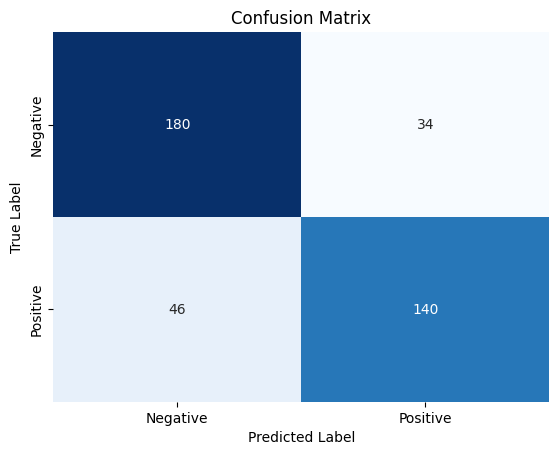

In [22]:
# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Function to predict sentiment for user input
def predict_sentiment(user_input):
    # Transform the input into the same format as the training data using the fitted TF-IDF vectorizer
    user_input_tfidf = tfidf.transform([user_input])

    # Predict sentiment using the trained Random Forest model
    prediction = rf_model.predict(user_input_tfidf)

    # Display the prediction result
    if prediction == 1:
        print("\nThe sentiment is: Positive 😃")
    else:
        print("\nThe sentiment is: Negative 😞")

# Get user input
while True:
  user_review = input("\nEnter a movie review for sentiment analysis: ")

# Predict sentiment for the user input
  predict_sentiment(user_review)